In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import datetime as dt
import os
import time

In [3]:
import lifetimes.plotting as lp
import lifetimes.utils as lu
import lifetimes.fitters as lf

In [4]:
plt.style.use('dark_background')
mpl.rcParams['figure.figsize'] = (12, 6)

In [5]:
raw_folder = '/home/sid/mystuff/myprogs/flirt/projects/product_analytics/customer_segmentation/data/raw'
datapath = os.path.join(raw_folder, 'online_retail.xlsx')

In [6]:
df = pd.read_excel(datapath, parse_dates=['InvoiceDate'], engine='openpyxl')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [9]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1721,536544,35961,FOLKART ZINC HEART CHRISTMAS DEC,1,2010-12-01,1.66,NaN,United Kingdom
456708,575706,20725,LUNCH BAG RED RETROSPOT,3,2011-11-10,1.65,14713.0,United Kingdom
519078,580136,22318,FIVE HEART HANGING DECORATION,1,2011-12-01,2.95,17841.0,United Kingdom
190459,553194,85124B,BLUE JUICY FRUIT PHOTO FRAME,3,2011-05-15,2.55,16283.0,United Kingdom
46232,540352,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,2011-01-06,3.36,NaN,United Kingdom


In [10]:
df = df[pd.notnull(df['CustomerID'])]
df = df[(df['Quantity'] > 0)]
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
336675,566399,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2011-09-12,4.95,16141.0,United Kingdom
110481,545688,84949,SILVER HANGING T-LIGHT HOLDER,2,2011-03-06,1.65,16033.0,United Kingdom
518794,580119,23188,VINTAGE 2 METRE FOLDING RULER,3,2011-12-01,1.65,17920.0,United Kingdom
388177,570420,23394,POSTE FRANCE CUSHION COVER,1,2011-10-10,3.75,17841.0,United Kingdom
455918,575656,23526,WALL ART DOG LICENCE,4,2011-11-10,5.95,13319.0,United Kingdom


In [11]:
df.shape

(397924, 8)

In [12]:
df['Sales'] = df['Quantity'] * df['UnitPrice'] ## similar to Revenue

In [13]:
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']

df = df[cols_of_interest]

In [14]:
df['CustomerID'].nunique()

4339

In [15]:
df.sample(5)

,CustomerID,InvoiceDate,Sales
421158,17895.0,2011-10-26,1.56
513647,14755.0,2011-11-30,19.80
241051,12493.0,2011-06-27,24.96
358513,16480.0,2011-09-25,3.75
401082,16412.0,2011-10-17,1.65


In [16]:
data = lu.summary_data_from_transaction_data(df, 
                                             'CustomerID', 
                                             'InvoiceDate', monetary_value_col='Sales', 
                                             observation_period_end='2011-12-9'                                           
                                            )

In [17]:
data.head(10)

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000
12352.0,6.0,260.0,296.0,368.256667
12353.0,0.0,0.0,204.0,0.000000
12354.0,0.0,0.0,232.0,0.000000
12355.0,0.0,0.0,214.0,0.000000


In [18]:
data.shape

(4339, 4)

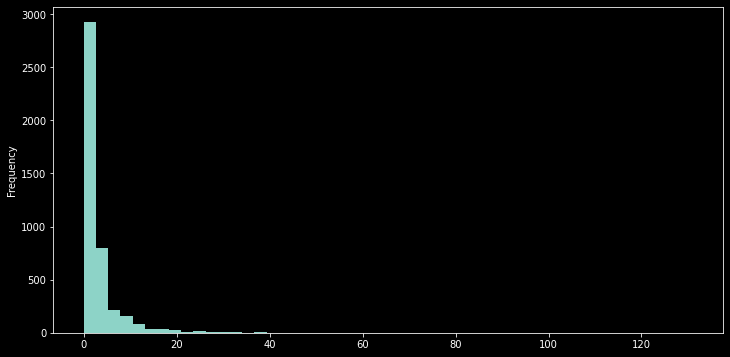

In [19]:
data['frequency'].plot(kind='hist', bins=50);

In [20]:
print(data['frequency'].describe())
print(sum(data['frequency'] == 0)/float(len(data)))

count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64
0.3569946992394561


## **Frequency/Recency Analysis Using the BG/NBD Model**

In [21]:
from lifetimes import BetaGeoFitter

In [ ]:
bgf = BetaGeoFitter

  Using cached jedi-0.17.2-py2.py3-none-any.whl (1.4 MB)
  Using cached parso-0.7.1-py2.py3-none-any.whl (109 kB)
  Attempting uninstall: parso
    Found existing installation: parso 0.8.1
    Uninstalling parso-0.8.1:
      Successfully uninstalled parso-0.8.1
